In [1]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.5/167.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.1 MB/s eta 0:00:00


In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [3]:
# Enable the cache
ff1.Cache.enable_cache('./cache')

# Setup plotting
plotting.setup_mpl()

/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [64]:
# Load the session data
session = ff1.get_session(2024, 'Silverstone', 'R')

In [65]:
session.event['EventName']

'British Grand Prix'

In [66]:
# Get the laps
load = session.load(telemetry=True)

core           INFO 	Loading data for British Grand Prix - Race [v3.4.3]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

In [67]:
print(session)

2024 Season Round 12: British Grand Prix - Race


In [68]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,1.0,1,2.0,NaT,NaT,NaT,0 days 01:22:27.059000,Finished,25.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,2.0,2,4.0,NaT,NaT,NaT,0 days 00:00:01.465000,Finished,18.0
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,GBR,3.0,3,3.0,NaT,NaT,NaT,0 days 00:00:07.547000,Finished,15.0
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,4.0,4,5.0,NaT,NaT,NaT,0 days 00:00:12.429000,Finished,12.0
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,5.0,5,7.0,NaT,NaT,NaT,0 days 00:00:47.318000,Finished,11.0
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,GER,6.0,6,6.0,NaT,NaT,NaT,0 days 00:00:55.722000,Finished,8.0
18,18,L STROLL,STR,stroll,Aston Martin,229971,aston_martin,Lance,Stroll,Lance Stroll,...,CAN,7.0,7,8.0,NaT,NaT,NaT,0 days 00:00:56.569000,Finished,6.0
14,14,F ALONSO,ALO,alonso,Aston Martin,229971,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,8.0,8,10.0,NaT,NaT,NaT,0 days 00:01:03.577000,Finished,4.0
23,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,THA,9.0,9,9.0,NaT,NaT,NaT,0 days 00:01:08.387000,Finished,2.0
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,10.0,10,13.0,NaT,NaT,NaT,0 days 00:01:19.303000,Finished,1.0


In [69]:
session.results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [73]:
session.results.iloc[0:10].loc[:, ['Abbreviation', 'Q3']]

,Abbreviation,Q3
44,HAM,NaT
1,VER,NaT
4,NOR,NaT
81,PIA,NaT
55,SAI,NaT
27,HUL,NaT
18,STR,NaT
14,ALO,NaT
23,ALB,NaT
22,TSU,NaT


Get all the laps for a single driver.

In [74]:
laps_ver = session.laps.pick_driver("VER")
laps_ham = session.laps.pick_driver("HAM")

/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Filter out slow laps as they distort the graph axis.

In [75]:
fastest_ver = laps_ver.pick_fastest().get_telemetry().assign(Driver='VER').add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().assign(Driver='HAM').add_distance()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [42]:
#print(fastest_ver)

In [76]:
# Concatenate DataFrames
telemetry = pd.concat([fastest_ver, fastest_ham], ignore_index=True)

In [41]:
#print(telemetry)

In [77]:
num_minisectors = 25 #can be any number
track_length = telemetry['Distance'].max()
minisector_length = track_length / num_minisectors

In [78]:
# Create a list of distances where each minisector starts
minisector_start_distances = [i * minisector_length for i in range(num_minisectors)]
print(f'Minisector Start Distances:\n {minisector_start_distances}')

Minisector Start Distances:
 [0.0, 232.51711111111064, 465.0342222222213, 697.551333333332, 930.0684444444425, 1162.5855555555531, 1395.102666666664, 1627.6197777777745, 1860.136888888885, 2092.653999999996, 2325.1711111111063, 2557.688222222217, 2790.205333333328, 3022.722444444438, 3255.239555555549, 3487.7566666666594, 3720.27377777777, 3952.790888888881, 4185.307999999992, 4417.825111111102, 4650.3422222222125, 4882.859333333324, 5115.376444444434, 5347.8935555555445, 5580.410666666656]


In [79]:
# Assign minisector to each telemetry point
telemetry['Minisector'] = (telemetry['Distance'] // minisector_length).astype(int)

# Calculate the average speed per driver per minisector
avg_speed_per_minisector = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().unstack()

In [80]:
fastest_driver_per_minisector = avg_speed_per_minisector.idxmax(axis=1)
print("Fastest Driver per Minisector:", fastest_driver_per_minisector)

# Add the fastest driver per minisector to the telemetry data
telemetry = telemetry.merge(
    fastest_driver_per_minisector.rename('Fastest_Driver'),
    how='left',
    on='Minisector'
)

Fastest Driver per Minisector: Minisector
0     HAM
1     VER
2     VER
3     HAM
4     HAM
5     VER
6     VER
7     VER
8     HAM
9     HAM
10    VER
11    VER
12    VER
13    VER
14    VER
15    VER
16    HAM
17    HAM
18    VER
19    VER
20    VER
21    HAM
22    HAM
23    HAM
24    VER
25    HAM
dtype: object


In [81]:
driver_mapping = {'VER': 1, 'HAM': 2}
telemetry['Fastest_Driver_Int'] = telemetry['Fastest_Driver'].map(driver_mapping)

# Sort the telemetry data by Distance
telemetry = telemetry.sort_values(by='Distance')

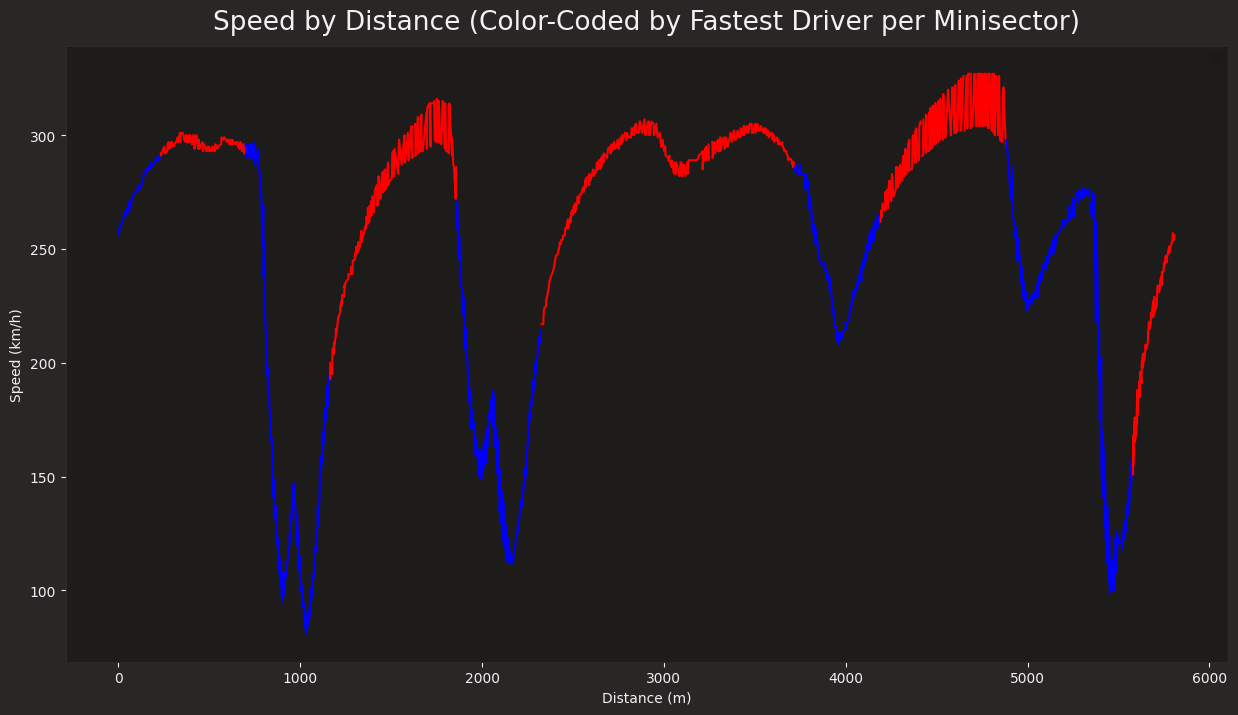

In [82]:
plt.figure(figsize=(15, 8))

# Plot each minisector with a color corresponding to the fastest driver
for minisector in telemetry['Minisector'].unique():
    sector_data = telemetry[telemetry['Minisector'] == minisector]
    color = 'red' if sector_data['Fastest_Driver'].iloc[0] == 'VER' else 'blue'
    plt.plot(sector_data['Distance'], sector_data['Speed'], color=color)

plt.title('Speed by Distance (Color-Coded by Fastest Driver per Minisector)')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.legend(loc='best')
plt.show()

<ipython-input-83-fe7972e9454d>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('winter', 2)


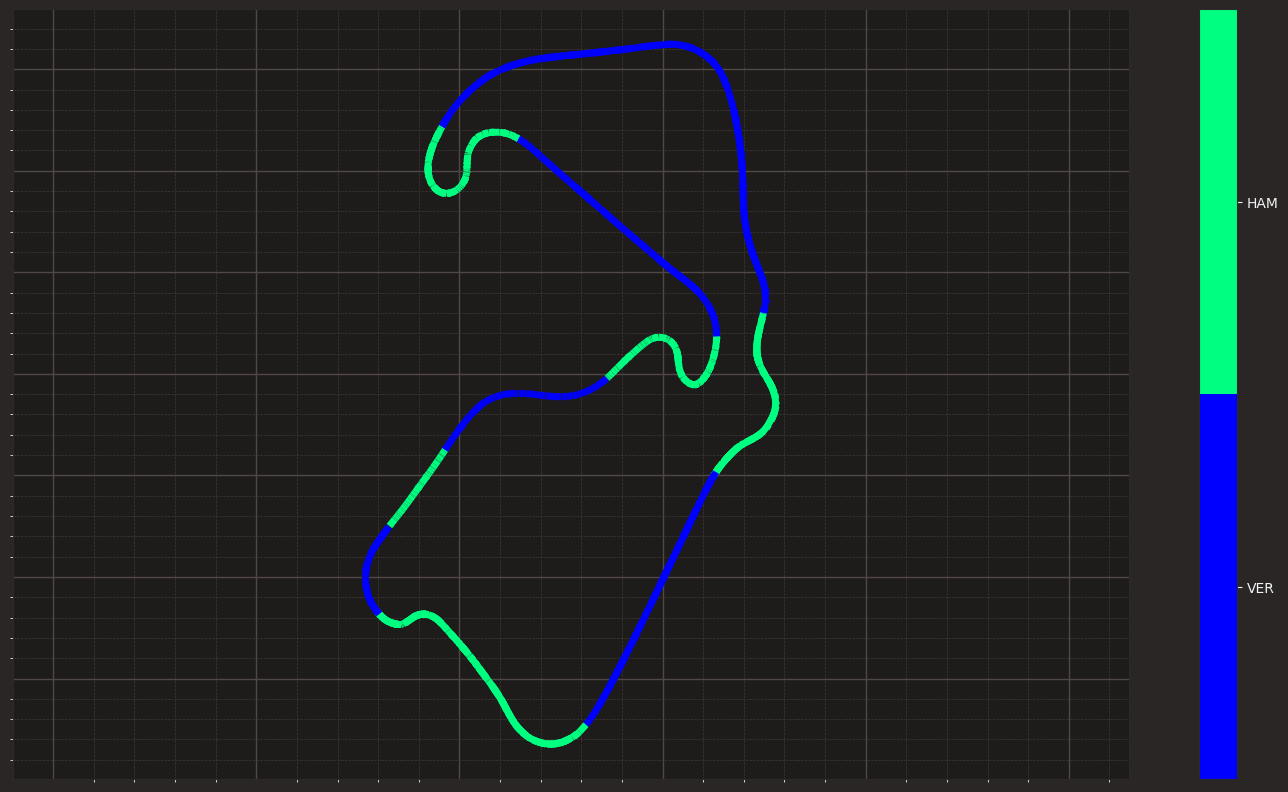

In [83]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

# Create points and segments for the LineCollection
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Fastest driver data as an array for color coding
fastest_driver_array = telemetry['Fastest_Driver_Int'].to_numpy().astype(float)

# Create the color map
cmap = cm.get_cmap('winter', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N + 1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

# Plot setup
plt.rcParams['figure.figsize'] = [18, 10]
fig, ax = plt.subplots()

# Add the collection to the plot
ax.add_collection(lc_comp)
ax.axis('equal')
ax.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Add color bar to indicate drivers
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['VER', 'HAM'])

# Save and display the plot
plt.savefig("2023_ver_ham_q.png", dpi=300)
plt.show()